# Personalized cancer diagnosis

## Data

### Data Overview

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data

- <p>
    Data file's information:
    <ul>
        <li>
        training_variants (ID , Gene, Variations, Class) - This file conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts use to classify the genetic mutations.
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>
- Both these data files are have a common column called ID

Example Data Point

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
<br>10,CBL,P395A,4</br>
<br>11,CBL,K382E,4</br>
<br>12,CBL,R420Q,4</br>
<br>13,CBL,C381A,4</br>
<br>14,CBL,P428L,5</br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
1|| Abstract Background  Non-small cell lung cancer (NSCLC) is a heterogeneous group of disorders with a number of genetic and proteomic alterations. c-CBL is an E3 ubiquitin ligase and adaptor molecule important in normal homeostasis and cancer. We determined the genetic variations of c-CBL, relationship to receptor tyrosine kinases (EGFR and MET), and functionality in NSCLC.  Methods and Findings  Using archival formalin-fixed paraffin embedded (FFPE) extracted genomic DNA, we show that c-CBL mutations occur in somatic fashion for lung cancers. c-CBL mutations were not mutually exclusive of MET or EGFR mutations; however they were independent of p53 and KRAS mutations. In normal/tumor pairwise analysis, there was significant loss of heterozygosity (LOH) for the c-CBL locus (22%, n = 8/37) and none of these samples revealed any mutation in the remaining copy of c-CBL. The c-CBL LOH also positively correlated with EGFR and MET mutations observed in the same samples. Using select c-CBL somatic mutations such as S80N/H94Y, Q249E and W802* (obtained from Caucasian, Taiwanese and African-American samples, respectively) transfected in NSCLC cell lines, there was increased cell viability and cell motility.  Conclusions  Taking the overall mutation rate of c-CBL to be a combination as somatic missense mutation and LOH, it is clear that c-CBL is highly mutated in lung cancers and may play an essential role in lung tumorigenesis and metastasis.  Go to: Introduction In the US alone, each year approximately 219,400 people are diagnosed with lung cancers, out of which more than 145,000 of them succumb to the disease [1]. This number is roughly equivalent to the combined mortality rates of cancers of the breast, prostate, colon, liver, kidney and melanoma [1]. In addition the prognosis is usually poor and the five-year survival rate is less than 15%. There are also significant ethnic differences for lung cancer, and the outcome is worse for blacks compared to whites. Gender differences are also striking with women having significantly better prognosis as compared to men. There are a number of genetic alterations that can occur in lung cancer. As an example, in NSCLC, mutations in KRAS, p53, EGFR and MET have been identified. Many of these pathways, especially Receptor Tyrosine Kinases (RTKs) are controlled by c-CBL.  CBL (Casitas B-lineage lymphoma) is a mammalian gene located on human chromosome 11q23 ...

There are nine different classes a genetic mutation can be classified into => Multi class classification problem         


<h3>Performance Metric</h3>


Metric(s):
* Multi class log-loss
* Confusion matrix


<h3>Objective</h3>

<p>Predict the probability of each data-point belonging to each of the nine classes.
</p>


<h1>Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

<h2>Reading Data</h2>

<h3>Reading Gene and Variation Data</h3>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir ~/.kaggle

# Read the uploaded kaggle.json file

!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

!!kaggle competitions download -c msk-redefining-cancer-treatment

['Downloading msk-redefining-cancer-treatment.zip to /content',
 '',
 '  0% 0.00/169M [00:00<?, ?B/s]',
 '  1% 1.00M/169M [00:00<01:25, 2.05MB/s]',
 '  2% 3.00M/169M [00:00<00:30, 5.63MB/s]',
 '  4% 7.00M/169M [00:00<00:12, 13.4MB/s]',
 '  7% 11.0M/169M [00:00<00:08, 19.7MB/s]',
 '  9% 15.0M/169M [00:00<00:06, 25.0MB/s]',
 ' 11% 19.0M/169M [00:01<00:05, 28.4MB/s]',
 ' 14% 23.0M/169M [00:01<00:05, 26.7MB/s]',
 ' 15% 26.0M/169M [00:01<00:07, 19.8MB/s]',
 ' 17% 29.0M/169M [00:01<00:07, 20.4MB/s]',
 ' 20% 33.0M/169M [00:01<00:05, 23.9MB/s]',
 ' 23% 39.0M/169M [00:01<00:04, 30.5MB/s]',
 ' 26% 44.0M/169M [00:02<00:03, 33.0MB/s]',
 ' 29% 49.0M/169M [00:02<00:03, 36.4MB/s]',
 ' 31% 53.0M/169M [00:02<00:03, 35.4MB/s]',
 ' 34% 58.0M/169M [00:02<00:03, 30.1MB/s]',
 ' 38% 64.0M/169M [00:02<00:03, 36.2MB/s]',
 ' 40% 68.0M/169M [00:02<00:03, 34.8MB/s]',
 ' 43% 73.0M/169M [00:02<00:02, 38.5MB/s]',
 ' 46% 77.0M/169M [00:03<00:02, 37.1MB/s]',
 ' 48% 81.0M/169M [00:03<00:02, 34.8MB/s]',
 ' 52% 87.0M/169

In [4]:
!unzip /content/msk-redefining-cancer-treatment.zip

Archive:  /content/msk-redefining-cancer-treatment.zip
  inflating: stage1_solution_filtered.csv.7z  
  inflating: stage2_sample_submission.csv.7z  
  inflating: stage2_test_text.csv.7z  
  inflating: stage2_test_variants.csv.7z  
  inflating: stage_2_private_solution.csv.7z  
  inflating: test_text.zip           
  inflating: test_variants.zip       
  inflating: training_text.zip       
  inflating: training_variants.zip   


In [5]:
!unzip /content/test_text.zip
!unzip /content/test_variants.zip
!unzip /content/training_text.zip
!unzip /content/training_variants.zip

Archive:  /content/test_text.zip
  inflating: test_text               
Archive:  /content/test_variants.zip
  inflating: test_variants           
Archive:  /content/training_text.zip
  inflating: training_text           
Archive:  /content/training_variants.zip
  inflating: training_variants       


In [6]:
data = pd.read_csv('/content/training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>Reading Text Data</h3>

In [7]:
data_text =pd.read_csv("/content/training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


<h3>Preprocessing of text</h3>

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()

        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "

        data_text[column][index] = string

In [10]:
#text processing
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755


In [11]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [12]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [13]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [14]:
result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


<h3>Test, Train and Cross Validation Split</h3>

<h4>Splitting data into train, test and cross validation (64:20:16)</h4>

In [15]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [16]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h4> Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

In [17]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

print("Distribution of class labels in Train Data:\n")
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

print("-"*8)
print("Distribution of class labels in Test Data:\n")
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print("-"*8)
print("Distribution of class labels in CV Data:\n")
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


Distribution of class labels in Train Data:

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)
--------
Distribution of class labels in Test Data:

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
-------

<h2>Univariate Analysis</h2>

In [18]:
# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):

    value_count = train_df[feature].value_counts()
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()

    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]

            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):

    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()

    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10*alpha) / (denominator + 90*alpha) </li>

<h3>Univariate Analysis on Gene Feature</h3>

In [19]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 237
Gene
BRCA1     170
TP53      107
EGFR       91
BRCA2      89
PTEN       81
KIT        69
BRAF       53
ALK        49
ERBB2      46
PIK3CA     36
Name: count, dtype: int64


In [20]:
print("There are", unique_genes.shape[0] ,"different categories of genes in the train data")

There are 237 different categories of genes in the train data


 For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [21]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [22]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [23]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [24]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 237)


<h3>Univariate Analysis on Variation Feature</h3>

In [25]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1933
Variation
Truncating Mutations    53
Amplification           48
Deletion                47
Fusions                 18
Overexpression           5
T58I                     3
G12V                     3
Q61K                     2
Y42C                     2
P34R                     2
Name: count, dtype: int64


In [26]:
print("There are", unique_variations.shape[0] ,"different categories of variations in the train data")

There are 1933 different categories of variations in the train data


There are two ways we can featurize Variation feature
<ol><li>One hot Encoding</li><li>Response coding</li></ol>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [27]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [28]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [29]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

<h3>Univariate Analysis on Text Feature</h3>

In [30]:
# cls_text is a data frame
# for every row in data frame consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [31]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [32]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names_out()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))

print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 52479


In [33]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

total_dict = extract_dictionary_paddle(train_df)

confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [34]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [35]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [36]:
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)
# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)
# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [37]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names_out()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [38]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

96.405 % of word of test data appeared in train data
97.802 % of word of Cross Validation appeared in train data


<h1>Machine Learning Models</h1>

In [39]:
def predict_and_plot_confusion_matrix(train_x, train_y, test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # Calculate log loss
    print("Log loss :", log_loss(test_y, sig_clf.predict_proba(test_x)))
    # Calculate number of mis-classified points
    misclassified = np.count_nonzero((pred_y - test_y))
    print("Number of mis-classified points :", misclassified / test_y.shape[0])

    # Generating the confusion matrix
    cm = confusion_matrix(test_y, pred_y)

    # Plotting the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

In [40]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [41]:
# merging gene, variance and text features
# building train, test and cross validation data sets

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))

In [42]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 54683)
(number of data points * number of features) in test data =  (665, 54683)
(number of data points * number of features) in cross validation data = (532, 54683)


In [43]:
train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [44]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


<h2>Base Line Model</h2>

<h3>1. Naive Bayes</h3>

<h4>Hyper parameter tuning</h4>

In [45]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For alpha =",i," Log Loss :",log_loss(cv_y, sig_clf_probs))


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


For alpha = 1e-05  Log Loss : 1.3205142129066472
For alpha = 0.0001  Log Loss : 1.314583292270375
For alpha = 0.001  Log Loss : 1.2929650027576198
For alpha = 0.1  Log Loss : 1.2735825727672223
For alpha = 1  Log Loss : 1.2882073484865968
For alpha = 10  Log Loss : 1.3996686685516018
For alpha = 100  Log Loss : 1.4303729276612114
For alpha = 1000  Log Loss : 1.3604448642844678
For values of best alpha =  0.1 The train log loss is: 0.8490366090234304
For values of best alpha =  0.1 The cross validation log loss is: 1.2735825727672223
For values of best alpha =  0.1 The test log loss is: 1.3074554673576197


<h4> Testing the model with best hyper paramters</h4>

In [46]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

Log Loss : 1.2735825727672223
Number of missclassified point : 0.38721804511278196


array([[ 48,   3,   1,  18,  12,   1,   8,   0,   0],
       [  3,  31,   0,   2,   2,   1,  33,   0,   0],
       [  0,   0,   3,   3,   0,   1,   7,   0,   0],
       [ 26,   6,   1,  66,   8,   1,   2,   0,   0],
       [  5,   2,   2,   0,  24,   2,   4,   0,   0],
       [  4,   3,   0,   1,   9,  22,   5,   0,   0],
       [  3,  15,   4,   0,   3,   1, 127,   0,   0],
       [  0,   0,   0,   0,   0,   1,   2,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   5]])

<h4>Feature Importance, Correctly classified point</h4>

In [47]:
test_point_index = 1

# Predicting class and probabilities
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
predicted_probs = np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]), 4)

print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", predicted_probs)
print("Actual Class :", test_y[test_point_index])

Predicted Class : 9
Predicted Class Probabilities: [[0.1032 0.0779 0.0158 0.1345 0.0796 0.0442 0.1592 0.0059 0.3796]]
Actual Class : 4


<h2>2. K Nearest Neighbour Classification</h2>

<h3> Hyper parameter tuning</h3>

In [48]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For alpha =",i,"Log Loss :",log_loss(cv_y, sig_clf_probs))


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


For alpha = 5 Log Loss : 1.0870419193886598
For alpha = 11 Log Loss : 1.10266678487863
For alpha = 15 Log Loss : 1.1037913902716305
For alpha = 21 Log Loss : 1.087664273651023
For alpha = 31 Log Loss : 1.0829316089248773
For alpha = 41 Log Loss : 1.0903140399435263
For alpha = 51 Log Loss : 1.1020641453261626
For alpha = 99 Log Loss : 1.1013815169459233
For values of best alpha =  31 The train log loss is: 0.791499639963108
For values of best alpha =  31 The cross validation log loss is: 1.0829316089248773
For values of best alpha =  31 The test log loss is: 1.1131946601494647


<h3> Testing the model with best hyper paramters</h3>

Log loss : 1.0829316089248773
Number of mis-classified points : 0.37406015037593987


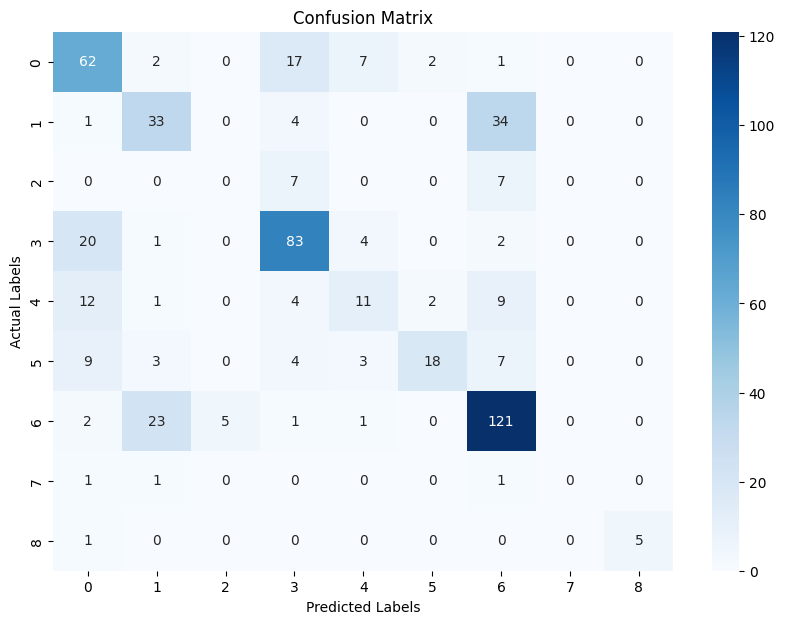

In [49]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

<h3>Sample Query point</h3>

In [50]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 4
The  31  nearest neighbours of the test points belongs to classes [5 9 5 7 4 9 8 9 9 8 9 5 5 9 9 9 9 9 9 4 4 9 9 8 8 4 4 4 9 9 7]
Fequency of nearest points : Counter({9: 15, 4: 6, 5: 4, 8: 4, 7: 2})


<h2>3. Logistic Regression</h2>

<h3> With Class balancing</h3>

<h4> Hyper paramter tuning</h4>

In [51]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For alpha =",i,"Log Loss :",log_loss(cv_y, sig_clf_probs))


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For alpha = 1e-06 Log Loss : 1.3375103824241854
For alpha = 1e-05 Log Loss : 1.3109732815879496
For alpha = 0.0001 Log Loss : 1.1725842327299931
For alpha = 0.001 Log Loss : 1.1567872090250921
For alpha = 0.01 Log Loss : 1.2070113491593328
For alpha = 0.1 Log Loss : 1.4435319857474327
For alpha = 1 Log Loss : 1.665430756973824
For alpha = 10 Log Loss : 1.6935298007329307
For alpha = 100 Log Loss : 1.6965782618021423
For values of best alpha =  0.001 The train log loss is: 0.5077378244221618
For values of best alpha =  0.001 The cross validation log loss is: 1.1567872090250921
For values of best alpha =  0.001 The test log loss is: 1.0719369501700156


<h4>Testing the model with best hyper paramters</h4>

Log loss : 1.1567872090250921
Number of mis-classified points : 0.34210526315789475


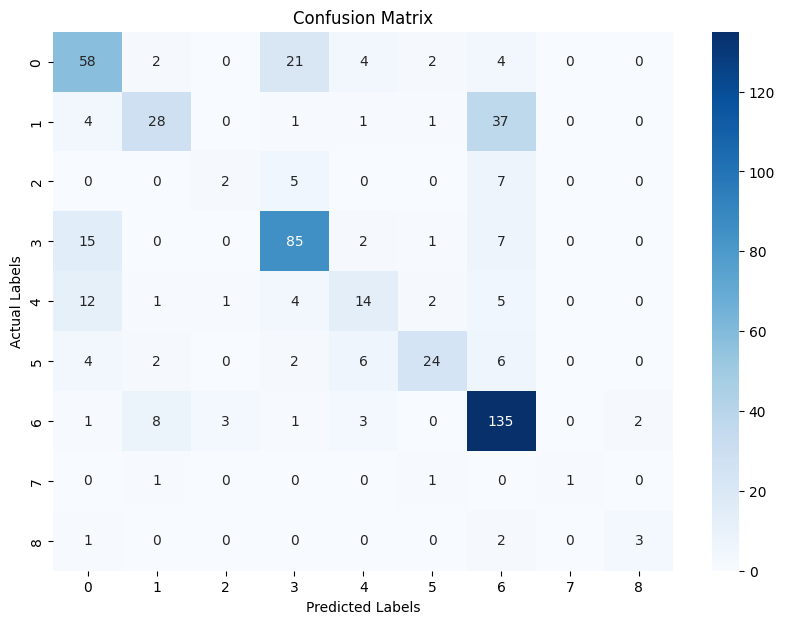

In [52]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h5>Sample Query point</h5>

In [53]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])

Predicted Class : 5
Predicted Class Probabilities: [[0.0459 0.0505 0.0112 0.176  0.3586 0.0265 0.159  0.0073 0.165 ]]
Actual Class : 4


<h3>Without Class balancing</h3>

<h4>Hyper paramter tuning</h4>

In [54]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("For alpha =",i,"Log Loss :",log_loss(cv_y, sig_clf_probs))


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For alpha = 1e-06 Log Loss : 1.3277916141437418
For alpha = 1e-05 Log Loss : 1.3120573511174454
For alpha = 0.0001 Log Loss : 1.209129362126138
For alpha = 0.001 Log Loss : 1.1643415248411595
For alpha = 0.01 Log Loss : 1.243815248718833
For alpha = 0.1 Log Loss : 1.4009666413774875
For alpha = 1 Log Loss : 1.5738620171859734
For values of best alpha =  0.001 The train log loss is: 0.5022374811699064
For values of best alpha =  0.001 The cross validation log loss is: 1.1643415248411595
For values of best alpha =  0.001 The test log loss is: 1.078700881025731


<h4>Testing model with best hyper parameters</h4>

Log loss : 1.1643415248411595
Number of mis-classified points : 0.33646616541353386


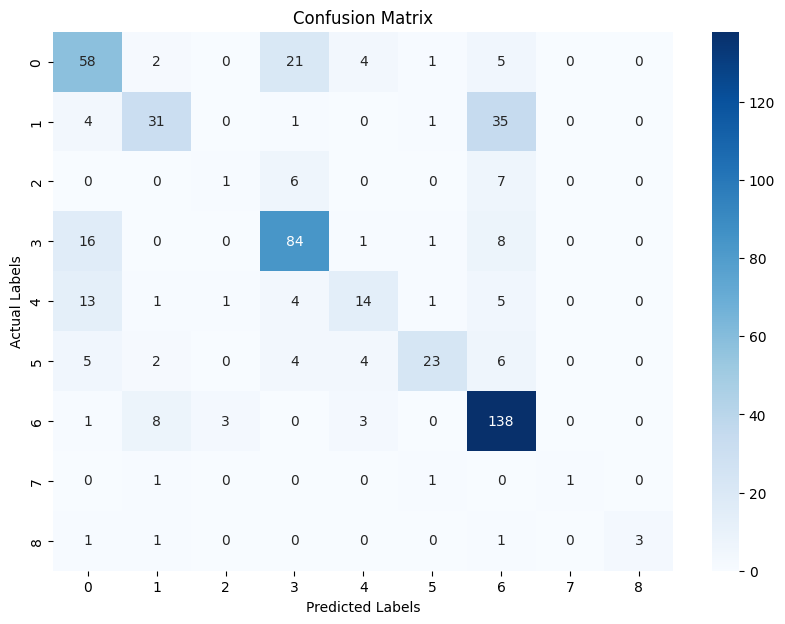

In [55]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h2>4. Linear Support Vector Machines</h2>

<h3> Hyper paramter tuning</h3>

In [56]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("For C =",i,"Log Loss :",log_loss(cv_y, sig_clf_probs))


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For C = 1e-05 Log Loss : 1.3122106597105159
For C = 0.0001 Log Loss : 1.2663910589302276
For C = 0.001 Log Loss : 1.2174889884683013
For C = 0.01 Log Loss : 1.2003633752805598
For C = 0.1 Log Loss : 1.3709062529079081
For C = 1 Log Loss : 1.685212452831912
For C = 10 Log Loss : 1.6970672844386736
For C = 100 Log Loss : 1.6970672944029543
For values of best alpha =  0.01 The train log loss is: 0.7117994709134843
For values of best alpha =  0.01 The cross validation log loss is: 1.2003633752805598
For values of best alpha =  0.01 The test log loss is: 1.1525616404613495


<h3> Testing model with best hyper parameters</h3>

Log loss : 1.2003633752805598
Number of mis-classified points : 0.3533834586466165


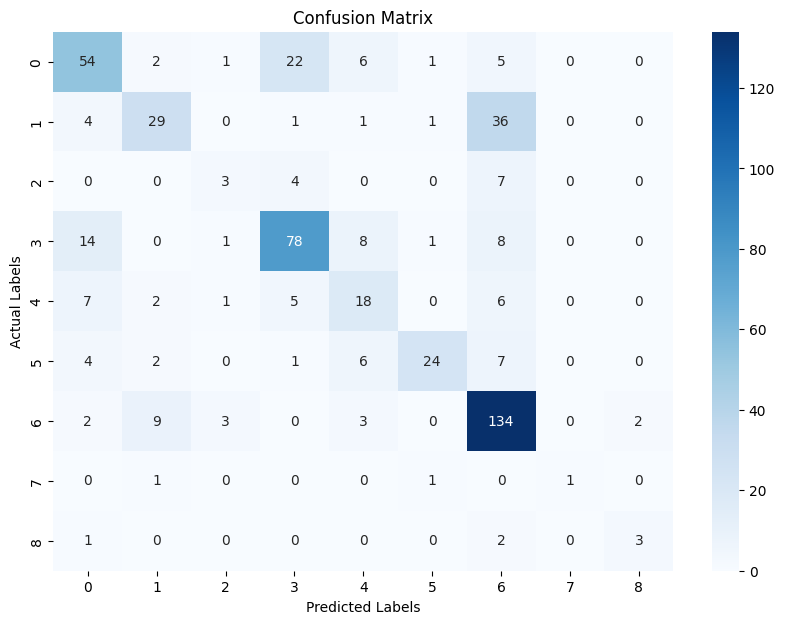

In [57]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h2>5. Random Forest Classifier</h2>

<h3>Hyper paramter tuning (With One hot Encoding)</h3>

In [58]:
alpha = [100,200,500,1000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs))

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.2755979629303116
for n_estimators = 100 and max depth =  10
Log Loss : 1.212486341211696
for n_estimators = 200 and max depth =  5
Log Loss : 1.2650411413780658
for n_estimators = 200 and max depth =  10
Log Loss : 1.1998927824803842
for n_estimators = 500 and max depth =  5
Log Loss : 1.262322683148924
for n_estimators = 500 and max depth =  10
Log Loss : 1.1993284211571165
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2591367385617263
for n_estimators = 1000 and max depth =  10
Log Loss : 1.198150103135861
For values of best estimator =  1000 The train log loss is: 0.6644952527058876
For values of best estimator =  1000 The cross validation log loss is: 1.198150103135861
For values of best estimator =  1000 The test log loss is: 1.1628487864819297


<h3>Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.198150103135861
Number of mis-classified points : 0.39849624060150374


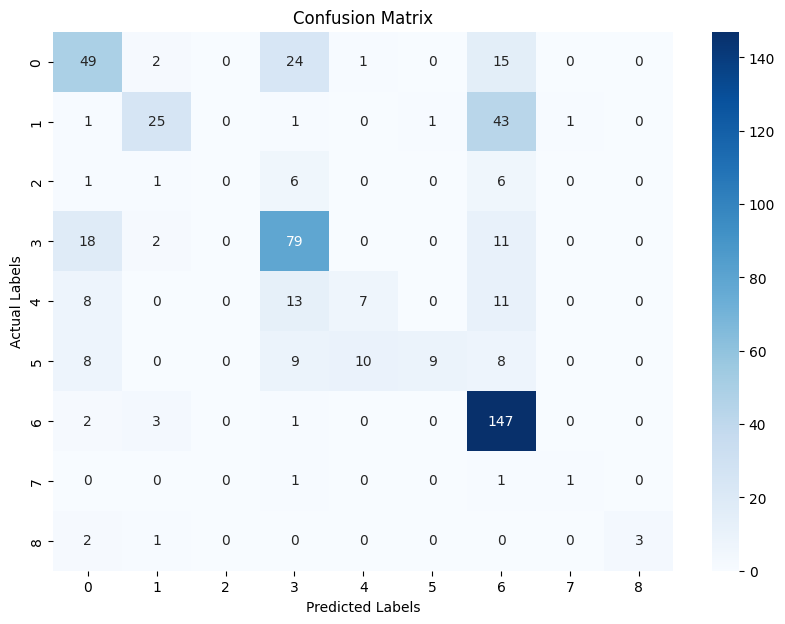

In [59]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h4>Sample Query point</h4>

In [60]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])

Predicted Class : 4
Predicted Class Probabilities: [[0.2428 0.098  0.0207 0.3369 0.0894 0.0571 0.1171 0.0132 0.0247]]
Actual Class : 4


<h3>Hyper paramter tuning (With Response Coding)</h3>

In [61]:
alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs))

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 1.8968203996729054
for n_estimators = 10 and max depth =  3
Log Loss : 1.6553076856203786
for n_estimators = 10 and max depth =  5
Log Loss : 1.418567259478348
for n_estimators = 10 and max depth =  10
Log Loss : 1.6880123935986966
for n_estimators = 50 and max depth =  2
Log Loss : 1.5518334631246702
for n_estimators = 50 and max depth =  3
Log Loss : 1.3793099287842314
for n_estimators = 50 and max depth =  5
Log Loss : 1.2291005928944323
for n_estimators = 50 and max depth =  10
Log Loss : 1.5803200862307138
for n_estimators = 100 and max depth =  2
Log Loss : 1.4486988293682277
for n_estimators = 100 and max depth =  3
Log Loss : 1.3735509247467208
for n_estimators = 100 and max depth =  5
Log Loss : 1.2609124294534029
for n_estimators = 100 and max depth =  10
Log Loss : 1.587656349446128
for n_estimators = 200 and max depth =  2
Log Loss : 1.4606810714854874
for n_estimators = 200 and max depth =  3
Log Loss : 1.3389075814727
fo

<h3>Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.2291005928944323
Number of mis-classified points : 0.40225563909774437


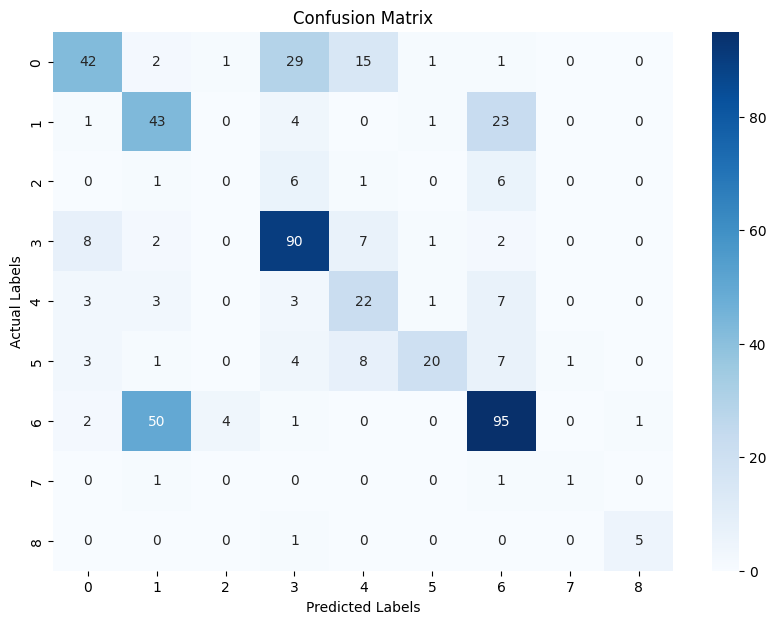

In [62]:
clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

<h2>6. Stack the models </h2>

<h3>Hyper parameter tuning</h3>

In [63]:
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10]
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.15
Support vector machines : Log Loss: 1.68
Naive Bayes : Log Loss: 1.29
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 1.818
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 1.720
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.326
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.201
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.492
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.797


<h3>Testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.4837425741129591
Log loss (CV) on the stacking classifier : 1.2010572681048193
Log loss (test) on the stacking classifier : 1.2277881497530723
Number of missclassified point : 0.38345864661654133


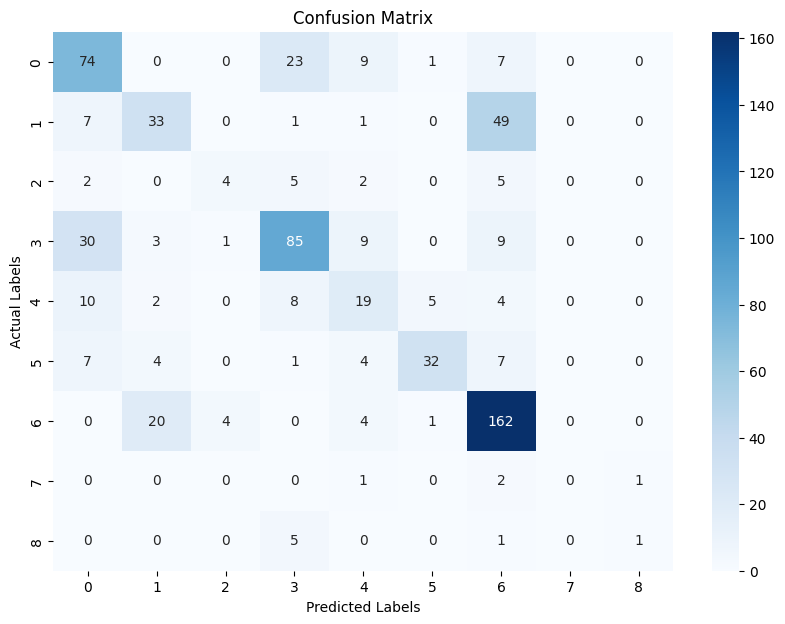

In [64]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
cm = confusion_matrix(test_y, sclf.predict(test_x_onehotCoding))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

<h3>7. Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.8467213679491344
Log loss (CV) on the VotingClassifier : 1.2175223937189474
Log loss (test) on the VotingClassifier : 1.2044863025577164
Number of missclassified point : 0.3924812030075188


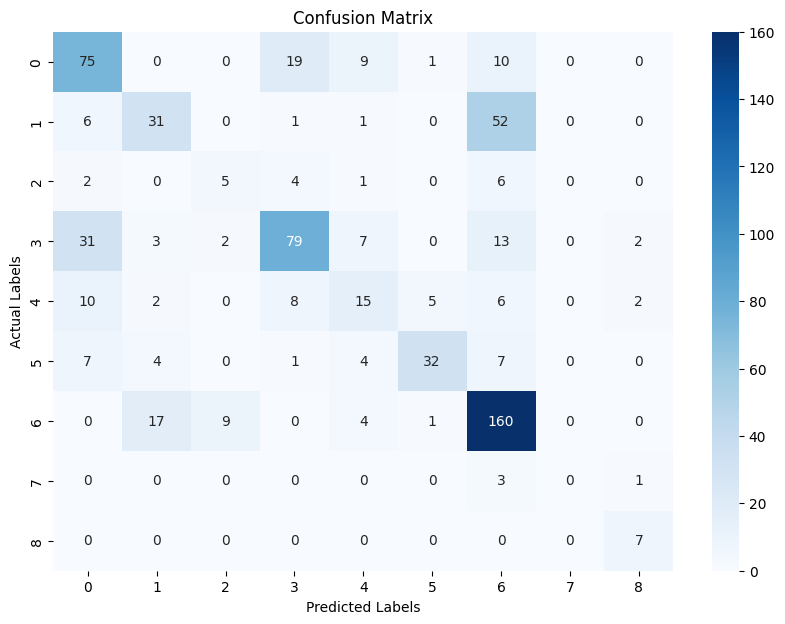

In [65]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
cm = confusion_matrix(test_y, vclf.predict(test_x_onehotCoding))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [66]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["S.No.", "Count Vectorizer + Model", "Best hyp", "Train", "CV", "Test"]
x.add_row(["1", "Naïve Bayes", "1", "0.90", "1.24", "1.25"])
x.add_row(["2", "K-Nearest Neighbour", "5", "0.46", "1.04", "1.00"])
x.add_row(["3", "LR + Balancing", "0.001", "0.51", "1.05", "1.05"])
x.add_row(["4", "Linear SVM + Balancing", "0.001", "0.53", "1.09", "1.12"])
x.add_row(["5", "Random Forest Classifier + One Hot Encoding", "2000", "0.69", "1.14", "1.10"])
x.add_row(["6", "Random Forest Classifier + Response Encoding", "50", "0.18", "1.32", "1.25"])
x.add_row(["7", "Stacking Classifier", "NA", "0.48", "1.12", "1.12"])
x.add_row(["8", "Maximum Voting Classifier", "NA", "0.85", "1.17", "1.18"])
print(x)

+-------+----------------------------------------------+----------+-------+------+------+
| S.No. |           Count Vectorizer + Model           | Best hyp | Train |  CV  | Test |
+-------+----------------------------------------------+----------+-------+------+------+
|   1   |                 Naïve Bayes                  |    1     |  0.90 | 1.24 | 1.25 |
|   2   |             K-Nearest Neighbour              |    5     |  0.46 | 1.04 | 1.00 |
|   3   |                LR + Balancing                |  0.001   |  0.51 | 1.05 | 1.05 |
|   4   |            Linear SVM + Balancing            |  0.001   |  0.53 | 1.09 | 1.12 |
|   5   | Random Forest Classifier + One Hot Encoding  |   2000   |  0.69 | 1.14 | 1.10 |
|   6   | Random Forest Classifier + Response Encoding |    50    |  0.18 | 1.32 | 1.25 |
|   7   |             Stacking Classifier              |    NA    |  0.48 | 1.12 | 1.12 |
|   8   |          Maximum Voting Classifier           |    NA    |  0.85 | 1.17 | 1.18 |
+-------+-

Key observations:

1. **Naïve Bayes**:
   - Achieved the lowest log loss on both the training and cross-validation sets.
   - Slight increase in log loss on the test set, indicating some generalization loss but still performs reasonably well.

2. **K-Nearest Neighbour (KNN)**:
   - Demonstrates overfitting as there is a significant increase in log loss from the training to the cross-validation and test sets.
   - Performance deteriorates considerably on the test set.

3. **Logistic Regression (LR)**:
   - LR with and without balancing the classes shows similar performance.
   - Log loss is slightly higher compared to Naïve Bayes but still reasonable.

4. **Linear SVM**:
   - Shows decent performance but slightly worse compared to LR and Naïve Bayes.
   - Notable increase in log loss on the test set, indicating some overfitting or generalization issues.

5. **Random Forest Classifier**:
   - Two variations were tried: with One Hot Encoding and with Response Encoding.
   - Both versions show reasonable performance, but Response Encoding seems to perform slightly worse.
   - Both versions exhibit some overfitting as there's a noticeable increase in log loss from the training to the test set.

6. **Stacking Classifier** and **Maximum Voting Classifier**:
   - These ensemble methods show competitive performance.
   - Maximum Voting Classifier performs slightly better than Stacking Classifier.

**Conclusion**:
- Naïve Bayes seems to be the best-performing classifier overall, with the lowest log loss across all sets.
